<a href="https://colab.research.google.com/github/ReyLira/H211S5_07_ReyGonzalez/blob/main/07_ReyGonzales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.impute import SimpleImputer
from google.colab import files


In [2]:
matches_data = files.upload()
players_data = files.upload()
worldcups_data = files.upload()

Saving WorldCupMatches.csv to WorldCupMatches.csv


Saving WorldCupPlayers.csv to WorldCupPlayers.csv


Saving WorldCups.csv to WorldCups.csv


In [5]:
matches_data = pd.read_csv("WorldCupMatches.csv")
players_data = pd.read_csv("WorldCupPlayers.csv")
worldcups_data = pd.read_csv("WorldCups.csv")

In [6]:
# Realizar ETL y EDA

# Mostrar las primeras filas de cada conjunto de datos
print("WorldCupMatches:")
print(matches_data.head())
print("\nWorldCupPlayers:")
print(players_data.head())
print("\nWorldCups:")
print(worldcups_data.head())

WorldCupMatches:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0   

In [7]:
# Verificar la información general de los conjuntos de datos
print("\nInformación general de WorldCupMatches:")
print(matches_data.info())
print("\nInformación general de WorldCupPlayers:")
print(players_data.info())
print("\nInformación general de WorldCups:")
print(worldcups_data.info())


Información general de WorldCupMatches:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-n

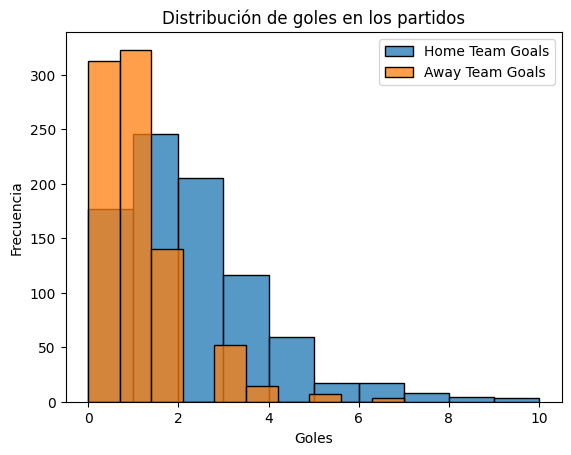

In [8]:
# Realizar análisis exploratorio de datos (EDA)

# Visualizar la distribución de los goles en los partidos
sns.histplot(matches_data['Home Team Goals'], bins=10, label='Home Team Goals')
sns.histplot(matches_data['Away Team Goals'], bins=10, label='Away Team Goals')
plt.title("Distribución de goles en los partidos")
plt.xlabel("Goles")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [15]:
# Aplicar técnicas de clasificación o regresión

# Eliminar filas con valores faltantes
matches_data.dropna(inplace=True)

# Preparar los datos para un modelo de clasificación
features = matches_data[['Home Team Goals', 'Away Team Goals']]
target = matches_data['Stage']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo de regresión logística:", accuracy)

# Mostrar el informe de clasificación
classification_report = classification_report(y_test, y_pred)
print("\nInforme de clasificación:\n", classification_report)


Precisión del modelo de regresión logística: 0.08823529411764706

Informe de clasificación:
                           precision    recall  f1-score   support

                   Final       0.00      0.00      0.00         1
             First round       0.00      0.00      0.00         1
                 Group 1       0.07      0.09      0.08        11
                 Group 2       0.07      0.14      0.10        14
                 Group 3       0.00      0.00      0.00        15
                 Group 4       0.00      0.00      0.00         9
                 Group 5       0.00      0.00      0.00         1
                 Group 6       0.00      0.00      0.00         1
                 Group A       0.11      0.36      0.16        11
                 Group B       0.29      0.17      0.21        12
                 Group C       0.00      0.00      0.00        10
                 Group D       0.00      0.00      0.00         9
                 Group E       0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit